In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

# calculate base

In [13]:
pv = 10000 #present value
time_horizon = 30 #time horizon
i = .07 #rate of return
additions = 10000 #annual additions

In [14]:
# calculate returns given flat rate of return
for year in range(time_horizon):
    ending = pv * (1+i) + additions
    #print(locale.currency(ending, grouping=True))
    pv = ending

# add variability

In [15]:
pv = 10000 #present value
time_horizon = 30 #time horizon
additions = 10000 #annual additions
expected_return = .07
volatility = .14

In [16]:
print('\tReturn', '\tEnding Value'.rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + additions
    print('\t{}'.ljust(10).format(round(market_return,4)), '\t{}'.rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return      	Ending Value
	0.2156               	$22,155.95
	0.0415               	$33,074.63
	-0.268               	$34,209.65
	0.3877               	$57,472.82
	-0.1238               	$60,358.78
	-0.1262               	$62,743.12
	0.1149               	$79,950.54
	0.0924               	$97,339.09
	-0.1271               	$94,965.39
	-0.0398               	$101,189.66
	-0.0898               	$102,106.13
	-0.0492               	$107,080.43
	0.1348               	$131,511.30
	-0.1057               	$127,605.66
	0.268               	$171,800.80
	0.1751               	$211,890.88
	-0.0213               	$217,385.81
	-0.0503               	$216,443.45
	-0.0108               	$224,112.52
	-0.0441               	$224,225.07
	-0.0189               	$229,996.07
	-0.0273               	$233,714.34
	0.0059               	$245,093.86
	0.1977               	$303,557.80
	-0.128               	$274,714.24
	-0.0666               	$266,410.64
	-0.1272               	$242,527.31
	-0.1898               

# monte carlo

In [17]:
iterations = 5000
thing = {}

for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)
        stream.append(end)
        pv = end
        thing.update({f"{x}": stream})
    attempt = pd.DataFrame.from_dict(thing)

# first five

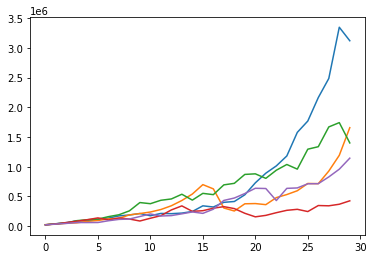

In [18]:
plt.plot(attempt.iloc[:, :5])

# summary stats

In [19]:
last = attempt.loc[29]
last.describe()

count    5.000000e+03
mean     1.482259e+06
std      1.121724e+06
min      1.254401e+05
25%      7.414077e+05
50%      1.157234e+06
75%      1.875771e+06
max      1.374568e+07
Name: 29, dtype: float64

(array([ 48., 190., 363., 433., 431., 434., 415., 330., 295., 243., 231.,
        198., 171., 156., 140.,  93.,  91.,  83.,  86.,  68.,  56.,  49.,
         42.,  40.,  35.,  32.,  39.,  22.,  17.,  17.,  13.,  12.,  15.,
          9.,   5.,   5.,  16.,   1.,   8.,   6.,  11.,   4.,   5.,   2.,
          4.,   1.,   3.,   4.,   1.,   4.,   3.,   2.,   4.,   1.,   2.,
          3.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  125440.14  ,   261642.4948,   397844.8496,   534047.2044,
          670249.5592,   806451.914 ,   942654.2688,  1078856.6236,
         1215058.9784,  1351261.3332,  1487463.688 ,  1623666.0428,
         1759868.3976,  1896070.7524,  2032273.1072,  2168475.462 ,
         2304677.8168,  2440880.1716,  2577082

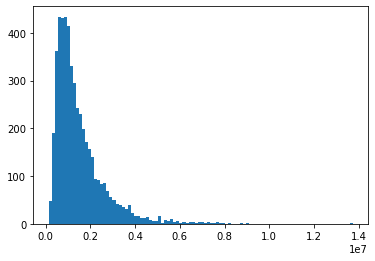

In [20]:
plt.hist(last, bins=100)

# what is the probability of 1mil?

In [21]:
print(round(((1-len(last[last<1000000])/len(last))*100), 2),'%')

58.26 %


# why not throw in some extra %iles

In [26]:
piles = np.percentile(last,[.001,5,10,25,50,78,90,95,99.999])
for i, p in enumerate(piles):
    l = [.001,5,10,25,50,78,90,95,99.999]
    print(f'{l[i]}%-ile'.rjust(15),locale.currency(p, grouping=True))

     0.001%-ile $125,505.53
         5%-ile $404,436.31
        10%-ile $496,571.76
        25%-ile $741,407.68
        50%-ile $1,157,234.04
        78%-ile $1,994,783.89
        90%-ile $2,850,791.09
        95%-ile $3,645,235.96
    99.999%-ile $13,508,887.71
